In [176]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve


np.random.seed(42)


In [195]:
train_data = pd.read_csv('prepared_training_data.csv')
test_data = pd.read_csv('prepared_test_data.csv')

y_train = train_data.casualty_severity
X_train = train_data.drop('casualty_severity', axis=1)

y_test = test_data.casualty_severity
X_test = test_data.drop('casualty_severity', axis=1)

In [178]:
X_train.head()

,number_of_vehicles,number_of_casualties,day_of_week,time,local_authority_district,speed_limit,junction_detail,pedestrian_crossing_physical_facilities,light_conditions,road_surface_conditions,...,casualty_type_Car rear seat passenger,casualty_type_Cyclist,casualty_type_Goods vehicle driver,casualty_type_Goods vehicle passenger,casualty_type_Motorcycle passenger,casualty_type_Motorcycle rider,casualty_type_Other vehicle occupant,casualty_type_Pedestrian,casualty_type_Public transport driver,casualty_type_Public transport passenger
0,3,1,5,14,2,30,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,2,3,5,23,2,40,0,0,1,1,...,False,False,False,False,False,False,False,False,False,False
2,2,3,5,23,2,40,0,0,1,1,...,False,False,False,False,False,False,False,False,False,False
3,2,3,5,23,2,40,0,0,1,1,...,False,False,False,False,False,False,False,False,False,False
4,2,1,7,13,2,60,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False


## Data preprocessing

We need to scale our numeric data so that we don't get overweighting in some models. We will use a MinMaxScaler to scale between 0 and 1, meaning that we won't affect our One-Hot Encoded columns

In [200]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [180]:
pd.DataFrame(X_train_scaled, columns=X_train.columns)

,number_of_vehicles,number_of_casualties,day_of_week,time,local_authority_district,speed_limit,junction_detail,pedestrian_crossing_physical_facilities,light_conditions,road_surface_conditions,...,casualty_type_Car rear seat passenger,casualty_type_Cyclist,casualty_type_Goods vehicle driver,casualty_type_Goods vehicle passenger,casualty_type_Motorcycle passenger,casualty_type_Motorcycle rider,casualty_type_Other vehicle occupant,casualty_type_Pedestrian,casualty_type_Public transport driver,casualty_type_Public transport passenger
0,0.285714,0.0000,0.714286,0.608696,0.666667,0.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.142857,0.1250,0.714286,1.000000,0.666667,0.4,0.0,0.0,0.5,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.142857,0.1250,0.714286,1.000000,0.666667,0.4,0.0,0.0,0.5,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.142857,0.1250,0.714286,1.000000,0.666667,0.4,0.0,0.0,0.5,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.142857,0.0000,1.000000,0.565217,0.666667,0.8,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11418,0.285714,0.0625,0.571429,0.869565,0.333333,0.2,1.0,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11419,0.142857,0.0000,0.285714,0.826087,1.000000,0.2,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11420,0.142857,0.0000,0.142857,0.869565,0.666667,0.4,0.0,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11421,0.142857,0.0000,0.142857,0.739130,0.333333,0.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Initial modelling

In [181]:
def evaluate_model(model_class, X_train=X_train_scaled, y_train=y_train):

    # K fold cross validation and predict on test data
    accuracy_scores = cross_val_score(model_class, X_train, y_train.to_numpy().ravel(), cv=5, scoring='accuracy') * 100
    precision_scores = cross_val_score(model_class, X_train, y_train.to_numpy().ravel(), cv=5, scoring='precision') * 100
    recall_scores = cross_val_score(model_class, X_train, y_train.to_numpy().ravel(), cv=5, scoring='recall') * 100
    f1_scores = cross_val_score(model_class, X_train, y_train.to_numpy().ravel(), cv=5, scoring='f1') * 100
    

    metrics_dict = {
        'Model Type': model_class,
        'CV_mean_accuracy': accuracy_scores.mean(), 
        'CV_mean_precision': precision_scores.mean(), 
        'CV_mean_recall': recall_scores.mean(), 
        'CV_mean_F1': f1_scores.mean()
        
       
    }   

    return metrics_dict

In [182]:
models = {'SVC': SVC(kernel='rbf'), 'KNN': KNeighborsClassifier(), 'Logistic Regression': LogisticRegression(), 'Decision Tree': DecisionTreeClassifier(), 'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(), 'Stochastic Gradient Descent': SGDClassifier(), 'Linear SVC': LinearSVC()}  

model_metric_dict = {}


In [183]:
for key, values in models.items():
  metrics_dict = evaluate_model(values)
  model_metric_dict.update({key: metrics_dict})

c:\Users\Elena\.conda\envs\DfT_project_env\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Elena\.conda\envs\DfT_project_env\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Elena\.conda\envs\DfT_project_env\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Elena\.conda\envs\DfT_project_env\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value o

In [184]:
results = pd.DataFrame.from_dict(model_metric_dict).T

In [185]:
results['combined_score'] = (results.CV_mean_accuracy + results.CV_mean_precision + results.CV_mean_recall + results.CV_mean_F1) / 4
results.sort_values(by='combined_score', ascending=False)

,Model Type,CV_mean_accuracy,CV_mean_precision,CV_mean_recall,CV_mean_F1,combined_score
Naive Bayes,GaussianNB(),67.11889,40.823611,41.817288,41.276574,47.759091
Decision Tree,DecisionTreeClassifier(),63.197105,33.940209,36.877971,35.734427,42.437428
KNN,KNeighborsClassifier(),66.427424,34.706822,24.184738,28.486092,38.451269
Random Forest,RandomForestClassifier(),72.152629,46.979069,12.946699,20.104477,38.045719
Logistic Regression,LogisticRegression(),72.362767,50.133309,9.907972,16.518928,37.230744
Linear SVC,LinearSVC(),72.345235,50.134271,8.26175,14.128109,36.217341
SVC,SVC(),71.951308,45.695262,4.970009,8.902312,32.879723
Stochastic Gradient Descent,SGDClassifier(),72.03009,12.028986,2.281992,3.659577,22.500161


### 🤠 Wooooohoooooo! 72 % accuracy straight off the bat for my very first classification algorithm. I'll take that!

In [193]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [100, 1000],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [3,5,10,50,None],
    'criterion' :['gini']
}

gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=param_grid,verbose=True, cv=2)
gd.fit(X_train_scaled, y_train)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
0.7273921781985426
RandomForestClassifier(max_depth=10, random_state=0)


In [194]:
gd.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [201]:
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(random_state=0, max_depth=10, max_features='sqrt', n_estimators=100)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test)

score=accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      2059
           1       0.35      0.40      0.38       813

    accuracy                           0.62      2872
   macro avg       0.55      0.56      0.55      2872
weighted avg       0.64      0.62      0.63      2872



In [230]:
confusion_matrix(y_test, y_pred)

array([[1463,  596],
       [ 487,  326]], dtype=int64)

In [204]:
y_prob_train = model.predict_proba(X_train_scaled)[:, 1]
y_prob_test =  model.predict_proba(X_test_scaled)[:, 1]

Text(0.5, 1.0, 'Train Precision-Recall curve')

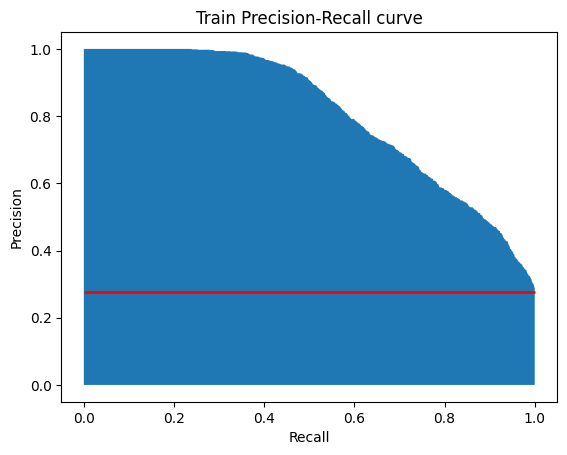

In [229]:
baseline = len(y_train[y_train==1]) / len(y_train)
fig, ax = plt.subplots()
precision, recall, thresholds = precision_recall_curve(y_train, y_prob_train)
ax.fill_between(recall, precision)
ax.set_ylabel("Precision")
ax.set_xlabel("Recall")
ax.hlines(y=baseline, xmin=0, xmax=1, linewidth=2, color='r', label='baseline')
ax.set_title("Train Precision-Recall curve")

Text(0.5, 1.0, 'Train Precision-Recall curve')

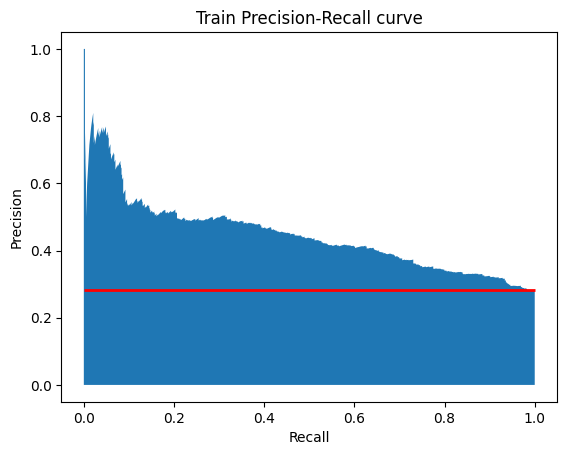

In [222]:
baseline = len(y_test[y_test==1]) / len(y_test)
fig, ax = plt.subplots()
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_test)
ax.fill_between(recall, precision)
ax.set_ylabel("Precision")
ax.set_xlabel("Recall")
ax.hlines(y=baseline, xmin=0, xmax=1, linewidth=2, color='r', label='baseline')
ax.set_title("Train Precision-Recall curve")

In [232]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X_test.columns)

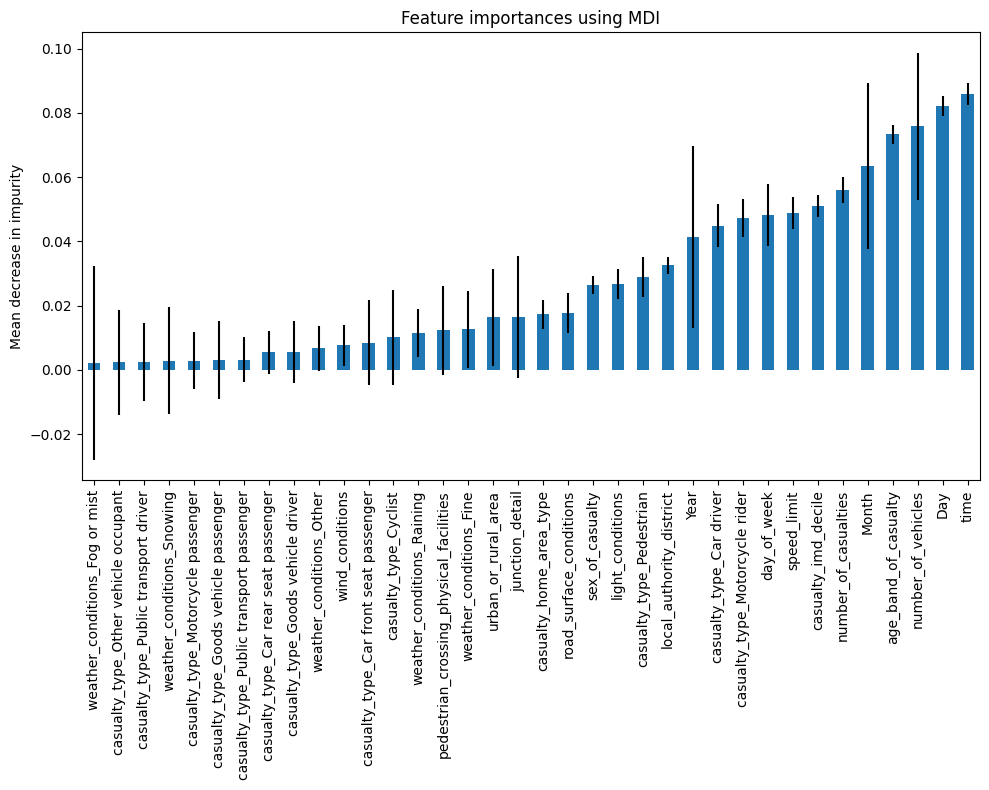

In [237]:
fig, ax = plt.subplots(figsize=(10,8))
forest_importances.sort_values().plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()